In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
img = Image.open('tiger.png')
img_np=np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [3]:
img_np.shape

(720, 1280, 3)

In [4]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [32]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(n_clusters=16)

In [33]:
pixel_centroids = model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids

array([3, 3, 3, ..., 5, 5, 5])

In [34]:
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
    final[0:4]

In [35]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [36]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('tiger_compressed.png')
img_1 = mpimg.imread('tiger.png')
img_2 = mpimg.imread('tiger_compressed.png')

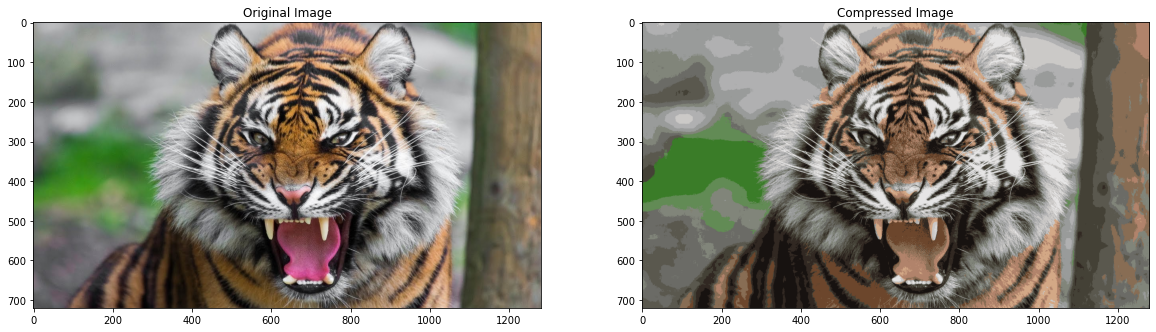

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()